In [1]:
# Backtest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# load data
df = pd.read_csv("AAPL.csv")

# convert date and set index
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")

# drop missing values
df = df.dropna()

# compute future return: (Price(t+1)-Price(t))/Price(t)
df["future_return"] = df["Adj Close"].shift(-1) / df["Adj Close"] - 1
# df["future_return1"] = df["Adj Close"].pct_change().shift(-1)

df["future_return"]

Date
1980-12-12   -0.052170
1980-12-15   -0.073403
1980-12-16    0.024750
1980-12-17    0.029000
1980-12-18    0.061024
                ...   
2021-01-25    0.001679
2021-01-26   -0.007684
2021-01-27   -0.034985
2021-01-28   -0.037421
2021-01-29         NaN
Name: future_return, Length: 10118, dtype: float64

In [11]:
# Create randam boolean signal series
np.random.seed(42)  # reproducibility
signal = pd.Series(
    np.random.choice([0, 1], size=len(df), p=[0.5, 0.5]),
    index=df.index,
    name="long_only_signal"
)
signal

Date
1980-12-12    0
1980-12-15    1
1980-12-16    1
1980-12-17    1
1980-12-18    0
             ..
2021-01-25    0
2021-01-26    0
2021-01-27    0
2021-01-28    0
2021-01-29    1
Name: long_only_signal, Length: 10118, dtype: int64

In [12]:
 # Backtest the signal
# PnL = signal * future_return
df["pnl_random"] = signal * df["future_return"]

In [13]:
df["pnl_random"]

Date
1980-12-12   -0.000000
1980-12-15   -0.073403
1980-12-16    0.024750
1980-12-17    0.029000
1980-12-18    0.000000
                ...   
2021-01-25    0.000000
2021-01-26   -0.000000
2021-01-27   -0.000000
2021-01-28   -0.000000
2021-01-29         NaN
Name: pnl_random, Length: 10118, dtype: float64

In [16]:
# compute total strategy return
total_pnl_random = df["pnl_random"].sum()
total_invested_random = signal.sum()  # 1$ per buy signal
strategy_return_random = total_pnl_random / total_invested_random
strategy_return_random

np.float64(0.0012520580172889913)

In [17]:
# "Always buy" strategy
always_signal = pd.Series(1, index=df.index, name="always_buy")

df["pnl_always"] = always_signal * df["future_return"]

total_pnl_always = df["pnl_always"].sum()
total_invested_always = len(df)  # invested every day
strategy_return_always = total_pnl_always / total_invested_always


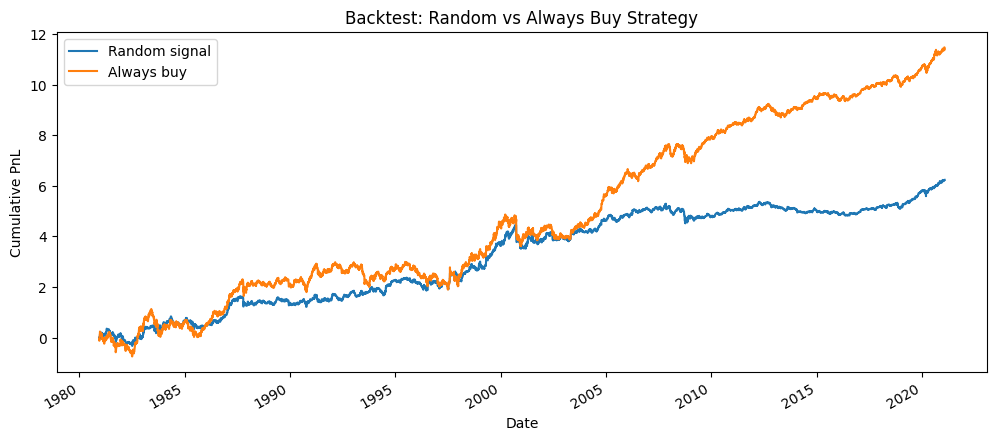

In [18]:
# plot comparison
plt.figure(figsize=(12,5))
df["pnl_random"].cumsum().plot(label="Random signal")
df["pnl_always"].cumsum().plot(label="Always buy")
plt.title("Backtest: Random vs Always Buy Strategy")
plt.ylabel("Cumulative PnL")
plt.legend()
plt.show()
